<a href="https://colab.research.google.com/github/syeedsaquib/Digit-Classification-using-CNN/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,MaxPool2D
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Axes: >

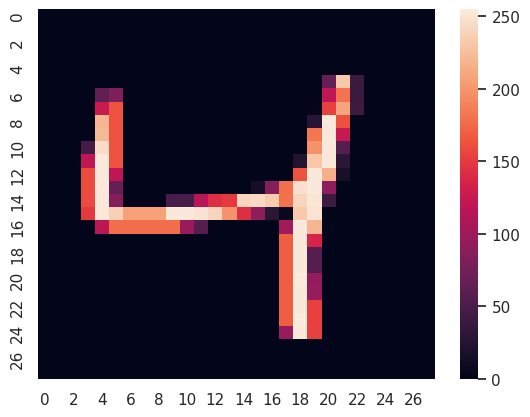

In [ ]:
sns.set()
sns.heatmap(x_train[2])

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 73s 34ms/step - loss: 0.2111 - accuracy: 0.9333 - val_loss: 0.0418 - val_accuracy: 0.9902
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0605 - accuracy: 0.9849 - val_loss: 0.0359 - val_accuracy: 0.9904
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0483 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0371 - accuracy: 0.9913 - val_loss: 0.0336 - val_accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0352 - accuracy: 0.9922 - val_loss: 0.0477 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0299 - accuracy: 0.9934 - val_loss: 0.0363 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0259 - accuracy: 0.9943 - val_loss: 0.0361 -

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0391 - accuracy: 0.9916


[0.039122939109802246, 0.991599977016449]

In [ ]:
y_predict = model.predict(x_test)
y_predict[3].argmax()

313/313 [==============================] - 3s 8ms/step


0

<Axes: >

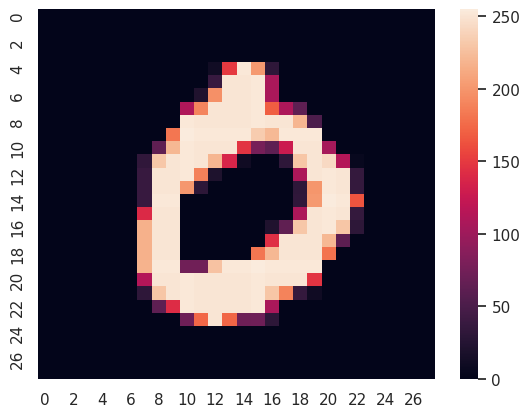

In [ ]:
sns.heatmap(x_test[3])

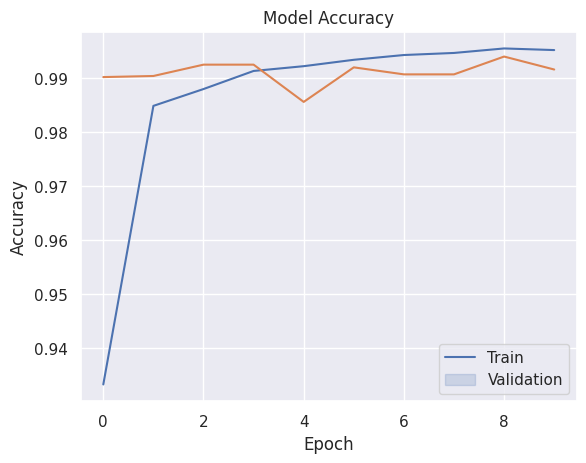

In [ ]:
sns.lineplot(hist.history["accuracy"])
sns.lineplot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()

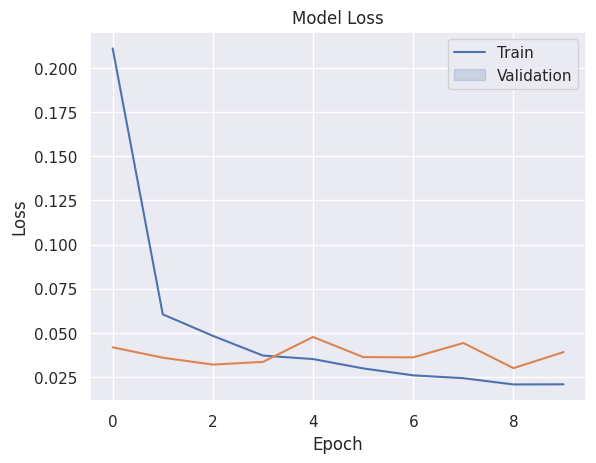

In [ ]:
sns.lineplot(hist.history["loss"])
sns.lineplot(hist.history["val_loss"])
plt.legend(["Train", "Val"], loc="upper right")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")